# Employee Data
-  

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [2]:
#options
# https://pandas.pydata.org/docs/user_guide/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("expand_frame_repr", True)
pd.set_option("max_info_columns", 11)
pd.set_option("display.precision", 3)
pd.set_option('display.width', 1000)  #wrap with full display

In [3]:
df = pd.read_csv('empData1.csv')

In [4]:
df.head()

,ser,empCode,eName,design,dept,cat,DOJ,DOL,sal,DOB,qual,expr,regdNo,regdVal,remarks,daysServed,monServed,age,exprYr
0,1,29,Dr. Ashwini L. Bargaje,Clinical Assistant,Medical,RMO,2020-04-12,2023-04-11,21000,1995-07-11,BHMS,2.0,75634,NaN,NaN,1094,36.0,28.0,2.0
1,2,25,Mr. Pratap V.Khedkar,Executive In HR,HR,Admin,2021-07-01,2022-06-30,25000,1979-11-14,Bachelor Of Arts,1.0,NaN,NaN,NaN,364,12.0,44.0,1.0
2,3,27,Mr. Shivdatta P. Gholap,Radiology Technician,Radiology,Technician,2021-07-01,2022-06-30,25000,1988-12-18,X-Raay Technician In Diploma,6.0,NaN,NaN,NaN,364,12.0,35.0,6.0
3,4,30,Dr. Akshay W. Sonar,Clinical Assistant,Medical,RMO,2021-07-27,2022-07-26,18000,1997-05-09,BHMS,4.0,1516138419,NaN,NaN,364,12.0,26.0,4.0
4,5,23,Dr. Akshay M. Jadhav,Clinical Assistant,Medical,RMO,2022-01-01,2022-12-31,19000,1996-10-14,BAMS,1.0,77980,2021-02-24,NaN,364,12.0,27.0,1.0


In [5]:
df.columns

Index(['ser', 'empCode', 'eName', 'design', 'dept', 'cat', 'DOJ', 'DOL', 'sal', 'DOB', 'qual', 'expr', 'regdNo', 'regdVal', 'remarks', 'daysServed', 'monServed', 'age', 'exprYr'], dtype='object')

In [6]:
df[['sal','age','exprYr','monServed']].head()

,sal,age,exprYr,monServed
0,21000,28.0,2.0,36.0
1,25000,44.0,1.0,12.0
2,25000,35.0,6.0,12.0
3,18000,26.0,4.0,12.0
4,19000,27.0,1.0,12.0


In [7]:
df[['sal','age','exprYr']].corr()  #

,sal,age,exprYr
sal,1.000,0.392,0.288
age,0.392,1.000,0.645
exprYr,0.288,0.645,1.000


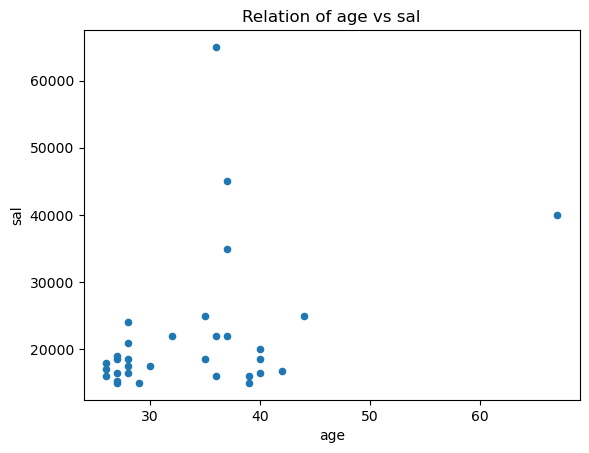

In [8]:
df.plot.scatter(x='age',y='sal', title='Relation of age vs sal')
plt.show();

In [9]:
#construct a Linear Model
from sklearn.linear_model import LinearRegression

In [10]:
reg1 = LinearRegression()

In [15]:
df1 = df[['sal','age','exprYr']].copy()
df1.head()

,sal,age,exprYr
0,21000,28.0,2.0
1,25000,44.0,1.0
2,25000,35.0,6.0
3,18000,26.0,4.0
4,19000,27.0,1.0


In [16]:
df1.isnull().sum()

sal       0
age       0
exprYr    1
dtype: int64

In [21]:
df1['exprYr'].fillna(df1['exprYr'].median(), inplace=True)

In [22]:
df1.isnull().sum()

sal       0
age       0
exprYr    0
dtype: int64

In [23]:
#IV, DV
#IV = age,  exprYr
#DV = sal
X = df1.drop(columns='sal')
y = df.sal
print(X.shape, y.shape)  #X- IV (hp, wt) DV (mpg) : Predict mpg by hp, wt

(32, 2) (32,)


In [24]:
reg1.fit(X,y) #run the model on X, y

LinearRegression()

In [26]:
print('R2 ', reg1.score(X,y).round(2))
#16% of variation in sal is due to age & expr

R2  0.16


In [27]:
print('Coefficients ', reg1.coef_)
print(X.columns)

Coefficients  [450.92714076 154.79351882]
Index(['age', 'exprYr'], dtype='object')


In [31]:
df1.describe()

,sal,age,exprYr
count,32.000,32.000,32.000
mean,22000.000,33.875,4.453
std,10553.122,8.257,4.210
min,15000.000,26.000,0.750
25%,16500.000,27.750,2.000
50%,18600.000,33.500,4.000
75%,22000.000,37.500,4.500
max,65000.000,67.000,20.000


In [29]:
#create new set of values
newData1 = pd.DataFrame({'age':[30,50], 'exprYr':[3, 10]})
newData1

,age,exprYr
0,30,3
1,50,10


In [30]:
print('Predict Sal for new Set of Data ', reg1.predict(newData1).round(2))

Predict Sal for new Set of Data  [20027.72 30129.82]
